# Dataset Overview

## Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Helper Functions

In [2]:
def plot_feature_samples_per_subject(df, column, save_fig=False):
    # Group by 'id' and count non-null 'CGM' values
    counts = df.groupby('id')[f'{column}'].count()
    print(f'{column} counts', counts)
    print(counts.max())
    print(counts.min())
    
    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(counts, bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(f'Number of {column} Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} samples per ID')
    
    plt.show()
    
    if save_fig:
        plt.savefig(f'{column}_feature_samples_per_subject.png')

In [3]:
def plot_daily_average_feature_sum_per_subject(df, column, save_fig=False):
    # Define a function to resample and calculate daily sum within each group
    def resample_and_sum(group):
        return group[f'{column}'].resample('D').sum().mean()
    
    # Apply the function to each group
    avg_daily_sum = df.groupby('id').apply(resample_and_sum)
    
    # Plot histogram of average daily sum of insulin
    plt.figure(figsize=(8, 6))
    plt.hist(avg_daily_sum, bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(f'Average Daily Sum of {column}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Average Daily Sum of {column} per Subject')
    plt.show()
    
    if save_fig:
        plt.savefig(f'{column}_daily_average_feature_sum_per_subject.png')

In [4]:
def plot_histogram_for_feature(df, column, save_fig=False):

    plt.figure()
    if column == 'bolus':
        plt.hist(df.replace(0, np.nan)[df['bolus'] < 60][column], bins=100, edgecolor='black', alpha=0.7)
    elif column == 'basal':
        plt.hist(df.replace(0, np.nan)[df['basal'] < 60][column], bins=100, edgecolor='black', alpha=0.7)
    else:
        plt.hist(df.replace(0, np.nan)[column], bins=100, edgecolor='black', alpha=0.7)
    plt.xlabel(f'{column} value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} values')
    plt.tight_layout()
    plt.show()

    if save_fig:
        plt.savefig(f'{column}_daily_average_feature_sum_per_subject.png')


In [5]:
def print_samples_per_feature(df):
    data = df.copy()
    data.loc[data['carbs'] == 0, 'carbs'] = np.nan
    data.loc[data['bolus'] == 0, 'bolus'] = np.nan
    data.loc[data['workout_intensity'] == 0, 'workout_intensity'] = np.nan
    
    for col in data.columns:
        print(f'{col}: {data[data[col].notna()][col].shape[0]}')

## Load Data

In [11]:
folder_path = os.path.join('../', 'processed_data')

datasets = {}
for dataset_folder in os.listdir(folder_path):
    if 'DS_Store' not in dataset_folder:
        print(dataset_folder)
        dataset_folder_path_train = os.path.join(folder_path, dataset_folder, "train")
        dataset_folder_path_test = os.path.join(folder_path, dataset_folder, "test")
    
        df_train_list = []
        df_test_list = []
        for subject_data in os.listdir(dataset_folder_path_train):
            if subject_data.endswith('.csv'):
                file_path = os.path.join(dataset_folder_path_train, subject_data)
                df = pd.read_csv(file_path, parse_dates=['date'], index_col='date', low_memory=False)
    
                df['id'] = subject_data.split(".")[0]
                #df.set_index('date', inplace=True)
                df_train_list.append(df)
    
        for subject_data in os.listdir(dataset_folder_path_test):
            if subject_data.endswith('.csv'):       
                file_path = os.path.join(dataset_folder_path_test, subject_data)
                df = pd.read_csv(file_path, parse_dates=['date'], index_col='date', low_memory=False)
    
                df['id'] = subject_data.split(".")[0]
                #df.set_index('date', inplace=True)
                df_test_list.append(df)
                
        combined_df_train = pd.concat(df_train_list)
        combined_df_test = pd.concat(df_test_list)
        datasets[dataset_folder] = {
            "train": combined_df_train,
            "test": combined_df_test,
        }

T1DEXI
T1DEXIP
tidepool_dataset
OhioT1DM


## Dataset Overview

#### Counting Subjects, Study Lengths, and Samples

In [ ]:
def print_numbers_for_datasets(df):
    n = len(df['id'].unique())
    total_samples_in_years = df['CGM'].notna().shape[0] / 12 / 24 / 365 # in years!
    
    # TODO: Average time span each subject when CGM not na
    if n == 0:
        average_per_subject = 0
    else:
        average_per_subject = total_samples_in_years * 365 / 30 / n
    
    # For the standard deviation, calculate the time span for each subject and then find the std
    time_span_per_subject = df[df['CGM'].notna()].groupby('id').size() / (12 * 24 * 30)
    std_time_span = np.std(time_span_per_subject)

    print(f"n={n}, total samples={total_samples_in_years:.1f} years, average time span={average_per_subject:.1f} months, std={std_time_span:.1f}")

for key in datasets:
    if not key in ['T1DEXI', 'T1DEXIP']:
        print("DATASET: ", key)
        train_df = datasets[key]['train']
        test_df = datasets[key]['test']
        combined_df = pd.concat([train_df, test_df])
        print_numbers_for_datasets(combined_df)
        print(" ")

t1dexi_dfs = []
for key in datasets:
    if key in ['T1DEXI', 'T1DEXIP']:
        train_df = datasets[key]['train']
        test_df = datasets[key]['test']
        # Creating unique ids
        train_df['id'] = train_df['id'] + f"_{key}"
        test_df['id'] = test_df['id'] + f"_{key}"
        
        t1dexi_dfs.append(train_df)
        t1dexi_dfs.append(test_df)

print("T1DEXI")
combined_df = pd.concat(t1dexi_dfs)
print_numbers_for_datasets(combined_df)
print(" ")

In [15]:
def print_samples_for_each_feature(df):

    # TODO: Let insulin carbs be nan if 0?
    
    for col in df.columns:
        if not col in ['id']:
            print(f"{col}: {df[col][df[col].notna()].shape[0]}")

for key in datasets:
    if not key in ['T1DEXI', 'T1DEXIP']:
        print("DATASET: ", key)
        train_df = datasets[key]['train']
        test_df = datasets[key]['test']
        combined_df = pd.concat([train_df, test_df])
        print_samples_for_each_feature(combined_df)
        print(" ")

t1dexi_dfs = []
for key in datasets:
    if key in ['T1DEXI', 'T1DEXIP']:
        train_df = datasets[key]['train']
        test_df = datasets[key]['test']
        # Creating unique ids
        train_df['id'] = train_df['id'] + f"_{key}"
        test_df['id'] = test_df['id'] + f"_{key}"
        
        t1dexi_dfs.append(train_df)
        t1dexi_dfs.append(test_df)

print("T1DEXI")
combined_df = pd.concat(t1dexi_dfs)
print_samples_for_each_feature(combined_df)
print(" ")

n=932, total samples=283.2 years, average time span=3.7 months, std=5.6


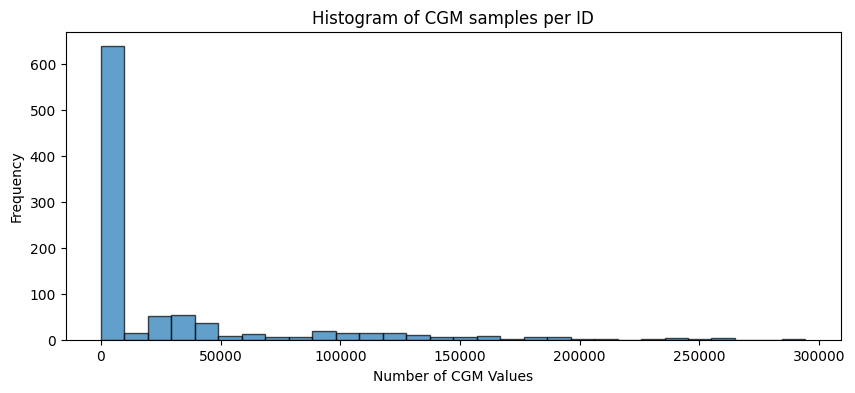

DATASET:  tidepool_dataset
CGM: Total 25740451, isna 1603861, sparsity 6.230897%
carbs: Total 25740451, isna 25396955, sparsity 98.665540%
bolus: Total 25740451, isna 25083490, sparsity 97.447749%
basal: Total 25740451, isna 3503213, sparsity 13.609758%
insulin: Total 25740451, isna 3464020, sparsity 13.457495%
workout_label: Total 25740451, isna 25602895, sparsity 99.465604%
calories_burned: Total 25740451, isna 25608224, sparsity 99.486307%
 
DATASET:  OhioT1DM
CGM: Total 188959, isna 22427, sparsity 11.868712%
carbs: Total 188959, isna 186818, sparsity 98.866950%
bolus: Total 188959, isna 185319, sparsity 98.073656%
basal: Total 188959, isna 4388, sparsity 2.322197%
gsr: Total 188959, isna 43585, sparsity 23.065850%
skin_temp: Total 188959, isna 43440, sparsity 22.989114%
exercise: Total 188959, isna 184996, sparsity 97.902720%
heartrate: Total 188959, isna 102462, sparsity 54.224461%
 
T1DEXI
CGM: Total 3839101, isna 155520, sparsity 4.050948%
meal_grams: Total 3839101, isna 381238

Processing dataset: tidepool_dataset
Processing dataset: OhioT1DM


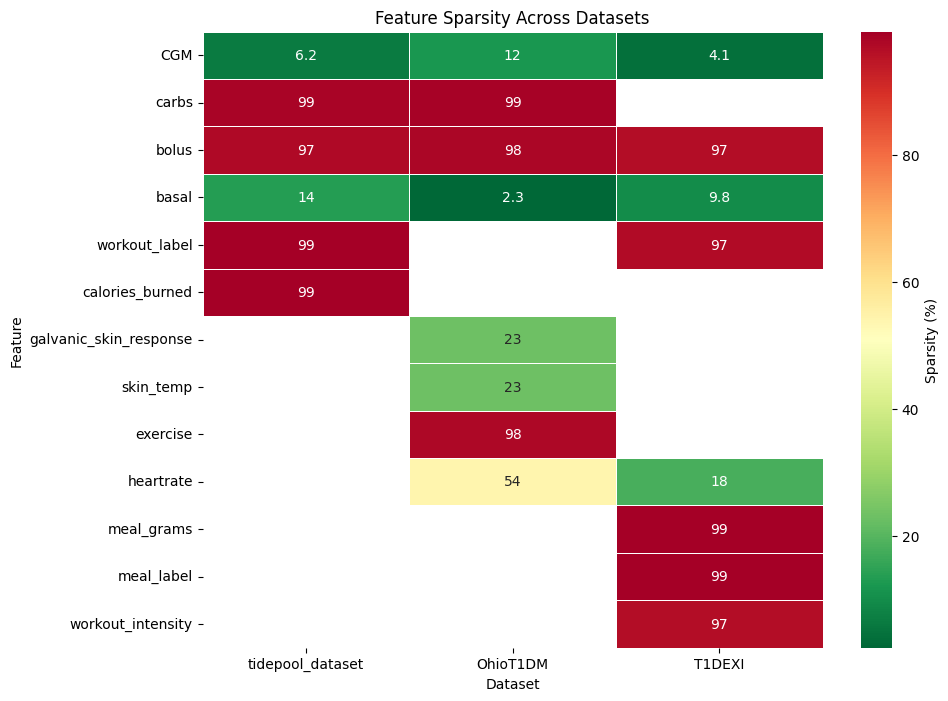

In [ ]:
# TODO: Combine all dfs, both training and test samples!

In [ ]:
plot_feature_samples_per_subject(combined_df, 'CGM')

In [ ]:
plot_daily_average_feature_sum_per_subject(combined_df, 'bolus')

In [ ]:
plot_histogram_for_feature(combined_df, 'carbs')

In [ ]:
# TODO: Separate this into test and train
print_samples_per_feature(combined_df)

CGM counts id
1000_T1DEXI_T1DEXI                                                                            7917
1004_T1DEXI_T1DEXI                                                                            7936
1010_T1DEXI_T1DEXI                                                                            7646
1012_T1DEXI_T1DEXI                                                                            7729
1013_T1DEXI_T1DEXI                                                                            7740
                                                                                             ...  
SAP100-f945009b76d237c14445d6de9a9478f407d9e9c85fc93e342d02fe5b42812cce_tidepool_dataset    156851
SAP100-fa6d14d94cca2cb2c33b9acd791a8fdbbc174c584396b26077a3cc1db1de1556_tidepool_dataset    262774
SAP100-fc2b12608d03f91a22838fa8f7b7a03314c3071d8b373dd94c214e9f3c012992_tidepool_dataset    171490
SAP100-fcb9778136ca5268cafc7e9cad4eab8c9bb15beacc2a79d4cb895fb854de7cc8_tidepool_dataset     93

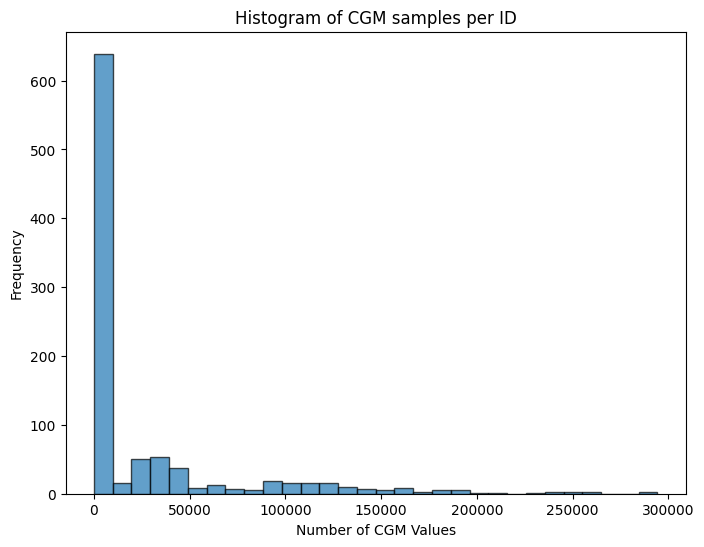

In [12]:
t1dexi_dfs = []
for key in datasets:
    if key in ['T1DEXI', 'T1DEXIP']:
        train_df = datasets[key]['train']
        test_df = datasets[key]['test']
        # Creating unique ids
        train_df['id'] = train_df['id'] + f"_{key}"
        test_df['id'] = test_df['id'] + f"_{key}"
        
        t1dexi_dfs.append(train_df)
        t1dexi_dfs.append(test_df)

print("T1DEXI")
combined_df = pd.concat(t1dexi_dfs)
print(" ")

T1DEXI
 


In [13]:
print(combined_df)

                     CGM  meal_grams    meal_name  bolus  basal workout  \
date                                                                      
2030-06-01 00:05:00  NaN         6.0  MEAL, SNACK    NaN   0.95     NaN   
2030-06-01 00:10:00  NaN         NaN          NaN    NaN   0.95     NaN   
2030-06-01 00:15:00  NaN         NaN          NaN    NaN   0.95     NaN   
2030-06-01 00:20:00  NaN         NaN          NaN    NaN   0.95     NaN   
2030-06-01 00:25:00  NaN         NaN          NaN    NaN   0.95     NaN   
...                  ...         ...          ...    ...    ...     ...   
2032-05-26 23:50:00  NaN         NaN          NaN    NaN    NaN     NaN   
2032-05-26 23:55:00  NaN         NaN          NaN    NaN    NaN     NaN   
2032-05-27 00:00:00  NaN         NaN          NaN    NaN    NaN     NaN   
2032-05-27 00:05:00  NaN         NaN          NaN    NaN    NaN     NaN   
2032-05-27 00:10:00  NaN         NaN          NaN    NaN    NaN     NaN   

                     wor

In [14]:
combined_df['meal_name'].value_counts()

SNACK                                                                                                                                                                                                                                                                                                                 8793
MEAL, SNACK                                                                                                                                                                                                                                                                                                            566
Nutrition bar or meal replacement bar, NFS                                                                                                                                                                                                                                                                             193
Apple, raw                                             

In [16]:
value_counts_df = combined_df['meal_name'].value_counts().reset_index()
value_counts_df.columns = ['meal name', 'value counts']  # Rename columns
average_grams_df = combined_df.groupby('meal_name')['meal_grams'].mean().reset_index()
average_grams_df.columns = ['meal name', 'average meal_grams']  # Rename columns
result_df = pd.merge(value_counts_df, average_grams_df, on='meal name')

unique_ids_df = combined_df.groupby('meal_name')['id'].unique().reset_index()
unique_ids_df.columns = ['meal name', 'unique_ids']  # Rename columns
result_df = pd.merge(result_df, unique_ids_df, on='meal name')

result_df

,meal name,value counts,average meal_grams,unique_ids
0,SNACK,8793,16.116510,"[545_T1DEXI, 223_T1DEXI, 1012_T1DEXI, 1210_T1D..."
1,"MEAL, SNACK",566,5.035336,"[545_T1DEXI, 223_T1DEXI, 1012_T1DEXI, 1210_T1D..."
2,"Nutrition bar or meal replacement bar, NFS",193,43.858031,"[419_T1DEXI, 1013_T1DEXI, 95_T1DEXI, 796_T1DEX..."
3,"Apple, raw",135,165.285407,"[948_T1DEXI, 97_T1DEXI, 966_T1DEXI, 386_T1DEXI..."
4,"Banana, raw",113,110.603097,"[1210_T1DEXI, 791_T1DEXI, 1013_T1DEXI, 80_T1DE..."
...,...,...,...,...
11259,"Avocado, raw, Bread, high protein, toasted, Br...",1,475.100000,[715_T1DEXI]
11260,"Cheese, NFS, Italian dressing, made with vineg...",1,423.790000,[715_T1DEXI]
11261,"Egg omelet or scrambled egg, NS as to fat, Egg...",1,460.350000,[715_T1DEXI]
11262,"Black, brown, or Bayo beans, canned, drained, ...",1,388.050000,[715_T1DEXI]


In [18]:
result_df[result_df['value counts'] > 1].to_csv('repeated meals.csv')

In [10]:
import os
import pandas as pd
path = os.path.join('..', 'unprocessed_data', 'T1DEXIP - DATA FOR UPLOAD', 'ML.xpt')
df_meals = pd.read_sas(path, format='xport')
df_meals = df_meals.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
df_meals['MLDTC'] = pd.to_datetime(df_meals['MLDTC'], unit='s')
df_meals['MLDOSE'] = pd.to_numeric(df_meals['MLDOSE'], errors='coerce')
df_meals.rename(columns={'MLDOSE': 'meal_grams', 'MLTRT': 'meal_label', 'MLCAT': 'meal_category', 'MLDTC': 'date',
                     'USUBJID': 'id'}, inplace=True)
#df_meals = df_meals[['meal_grams', 'meal_label', 'meal_category', 'id', 'date']]
df_meals = df_meals[['meal_grams', 'meal_label', 'id', 'date']]
df_meals.sort_values(by='date', inplace=True)
df_meals

,meal_grams,meal_label,id,date
2366,3.00,MEAL,284,2030-09-29 00:00:00
2385,2.00,SNACK,284,2030-09-29 00:00:00
329,3.00,SNACK,116,2030-10-05 00:00:00
325,3.00,MEAL,116,2030-10-05 00:00:00
3061,2.00,MEAL,34,2030-10-12 00:00:00
...,...,...,...,...
6012,244.00,Pasta with pesto sauce,92,2032-09-10 11:37:00
6021,113.60,Pork sausage,92,2032-09-10 11:37:00
6024,6.25,Sweet potato chips,92,2032-09-10 11:37:00
6022,90.00,"Quesadilla, just cheese, meatless",92,2032-09-10 16:03:00


In [11]:
path = os.path.join('..', 'unprocessed_data', 'T1DEXIP - DATA FOR UPLOAD', 'FAMLPI.xpt')
FAMLPI_data = pd.read_sas(path, format='xport')
FAMLPI_data = FAMLPI_data.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

df_fa_meals = FAMLPI_data[FAMLPI_data['FATESTCD'] == "DCARBT"][FAMLPI_data['FACAT'] == "CONSUMED"]
df_fa_meals['FADTC'] = pd.to_datetime(df_fa_meals['FADTC'], unit='s')
df_fa_meals['FASTRESN'] = pd.to_numeric(df_fa_meals['FASTRESN'], errors='coerce')
df_fa_meals.rename(columns={'FASTRESN': 'carbs', 'FADTC': 'date', 'USUBJID': 'id'}, inplace=True)
df_fa_meals = df_fa_meals[['carbs', 'id', 'date']]
df_fa_meals.sort_values(by='date', inplace=True)
df_fa_meals

/var/folders/q1/5jqy1fgs07j9ptpmdsmmhxnw0000gn/T/ipykernel_32715/1149502672.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fa_meals = FAMLPI_data[FAMLPI_data['FATESTCD'] == "DCARBT"][FAMLPI_data['FACAT'] == "CONSUMED"]


,carbs,id,date
90078,1.399000e+01,116,2030-10-29 10:27:30
90045,6.252000e+01,116,2030-10-29 10:27:30
90048,5.397605e-79,116,2030-10-29 10:27:30
90072,6.174000e+01,116,2030-10-29 11:11:07
90075,1.372000e+01,116,2030-10-29 11:11:47
...,...,...,...
1691083,1.610000e+00,92,2032-09-10 11:37:00
1691089,3.530000e+00,92,2032-09-10 11:37:00
1691005,6.660000e+00,92,2032-09-10 11:37:00
1691086,2.923000e+01,92,2032-09-10 16:03:00


In [12]:
df_merged = pd.merge(df_meals, df_fa_meals, on=["date", "id"], how='outer')
df_merged.set_index('date', inplace=True)
df_merged

,meal_grams,meal_label,id,carbs
date,,,,
2030-09-29 00:00:00,3.00,MEAL,284,NaN
2030-09-29 00:00:00,2.00,SNACK,284,NaN
2030-10-05 00:00:00,3.00,SNACK,116,NaN
2030-10-05 00:00:00,3.00,MEAL,116,NaN
2030-10-12 00:00:00,2.00,MEAL,34,NaN
...,...,...,...,...
2032-09-10 11:37:00,6.25,Sweet potato chips,92,1.61
2032-09-10 11:37:00,6.25,Sweet potato chips,92,3.53
2032-09-10 11:37:00,6.25,Sweet potato chips,92,6.66


In [15]:
df_combined = pd.concat([df_meals, df_fa_meals])
df_combined.set_index('date', inplace=True)
df_combined

,meal_grams,meal_label,id,carbs
date,,,,
2030-09-29 00:00:00,3.0,MEAL,284,NaN
2030-09-29 00:00:00,2.0,SNACK,284,NaN
2030-10-05 00:00:00,3.0,SNACK,116,NaN
2030-10-05 00:00:00,3.0,MEAL,116,NaN
2030-10-12 00:00:00,2.0,MEAL,34,NaN
...,...,...,...,...
2032-09-10 11:37:00,NaN,NaN,92,1.61
2032-09-10 11:37:00,NaN,NaN,92,3.53
2032-09-10 11:37:00,NaN,NaN,92,6.66


In [17]:
df_subject_meals = df_combined[df_combined['id'] == '107'].copy()
df_subject_meals

,meal_grams,meal_label,id,carbs
date,,,,
2031-06-10 00:00:00,3.00,MEAL,107,NaN
2031-06-10 00:00:00,1.00,SNACK,107,NaN
2031-07-16 10:47:43,244.00,"Milk, NFS",107,NaN
2031-07-16 10:47:43,34.00,"Tortilla, flour",107,NaN
2031-07-16 10:47:43,40.00,"Pork bacon, NS as to fresh, smoked or cured, c...",107,NaN
2031-07-16 10:47:43,202.50,"Egg omelet or scrambled egg, NS as to fat",107,NaN
2031-07-16 15:45:38,46.86,"Mixed nuts, with peanuts, salted",107,NaN
2031-07-16 16:52:11,31.50,"Chocolate, semi-sweet morsel",107,NaN
2031-07-16 16:52:11,48.00,Peanut butter,107,NaN


In [23]:
df_subject_meal_grams = df_subject_meals[df_subject_meals['meal_grams'].notna()][['meal_grams']].resample('5min', label='right').sum()
df_subject_meal_name = df_subject_meals[df_subject_meals['meal_label'].notna()][['meal_label']].resample('5min', label='right').agg(
    lambda x: ', '.join(x))
df_subject_carbs = df_subject_meals[df_subject_meals['carbs'].notna()][['carbs']].resample('5min', label='right').sum()

In [22]:
df_subject_meal_grams

,meal_grams
date,
2031-06-10 00:05:00,4.0
2031-06-10 00:10:00,0.0
2031-06-10 00:15:00,0.0
2031-06-10 00:20:00,0.0
2031-06-10 00:25:00,0.0
...,...
2031-07-23 15:50:00,0.0
2031-07-23 15:55:00,0.0
2031-07-23 16:00:00,0.0


In [24]:
df_subject_meal_name

,meal_label
date,
2031-06-10 00:05:00,"MEAL, SNACK"
2031-06-10 00:10:00,
2031-06-10 00:15:00,
2031-06-10 00:20:00,
2031-06-10 00:25:00,
...,...
2031-07-23 15:50:00,
2031-07-23 15:55:00,
2031-07-23 16:00:00,


In [25]:
df_subject_carbs

,carbs
date,
2031-07-16 10:50:00,30.73
2031-07-16 10:55:00,0.00
2031-07-16 11:00:00,0.00
2031-07-16 11:05:00,0.00
2031-07-16 11:10:00,0.00
...,...
2031-07-23 15:50:00,0.00
2031-07-23 15:55:00,0.00
2031-07-23 16:00:00,0.00
